In [1]:
import os
from typing import *


os.getcwd()
# Setting the baseline:
os.chdir('/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP')


curPath: str = os.getcwd() + "/src/VisualGraphStudy/"

dataPath: str = curPath + "_data/"


print("curPath = ", curPath, "\n")
print("dataPath = ", dataPath, "\n")

curPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/ 

dataPath =  /development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/_data/ 



In [2]:
import sys
# Making files in utils folder visible here: to import my local print functions for nn.Module objects
sys.path.append(os.getcwd() + "/src/utils/")
# For being able to import files within CausalNex folder
sys.path.append(curPath)
sys.path.append(curPath + 'fonts/')

sys.path



['/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python37.zip',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/lib-dynload',
 '',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages',
 '/development/bin/python/conda3_ana/envs/pybayesian_env/lib/python3.7/site-packages/IPython/extensions',
 '/home/statisticallyfit/.ipython',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/utils/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/',
 '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP/src/VisualGraphStudy/fonts/']

Fitting node states, using the input data:

In [3]:
import pandas as pd
from pandas.core.frame import DataFrame

from src.utils.DataUtil import *

CPD_workCapacity: DataFrame = pd.read_csv(dataPath + 'cpd_workcapacity.csv', delimiter =',')
CPD_workCapacity

,Time,ExertionLevel,ExperienceLevel,TrainingLevel,Low,High
0,1,Low,Low,Low,0.01,99
1,1,Low,Low,High,20.00,80
2,1,Low,High,Low,15.00,85
3,1,Low,High,High,2.00,98
4,1,High,Low,Low,90.00,10
5,1,High,Low,High,60.00,40
6,1,High,High,Low,19.00,81
7,1,High,High,High,11.00,89
8,2,Low,Low,Low,31.00,69
9,2,Low,Low,High,21.00,79


In [4]:
CPD_exertionLevel: DataFrame = pd.read_csv(dataPath + 'cpd_exertion_experience_training.csv', delimiter =',').dropna()
CPD_experienceLevel = CPD_exertionLevel.copy()
CPD_trainingLevel = CPD_exertionLevel.copy()

CPD_exertionLevel

,Low,High
0,50,50


In [5]:
CPD_injuryType: DataFrame = pd.read_csv(dataPath + 'cpd_injurytype.csv', delimiter =',').dropna()

CPD_injuryType

,ProcessType,UsesOps,Chemical-Burn,Electrical-Burn,Electrical-Shock,Contact-Contusion,FallGtm
0,Accel-Pedal,Forklift,20.0,20.0,20,20.0,20.0
1,Accel-Pedal,Front-Right-Door,20.0,20.0,20,20.0,20.0
2,Accel-Pedal,Oil,20.0,20.0,20,20.0,20.0
3,Accel-Pedal,Power-Gun,1.0,40.0,57,1.0,1.0
4,Door-Mount,Forklift,1.0,8.0,1,80.0,10.0
5,Door-Mount,Front-Right-Door,1.0,7.0,2,75.0,15.0
6,Door-Mount,Oil,43.0,33.0,22,1.0,1.0
7,Door-Mount,Power-Gun,2.5,2.5,90,2.5,2.5
8,Engine-Mount,Forklift,1.0,8.0,1,80.0,10.0
9,Engine-Mount,Front-Right-Door,1.0,8.0,1,80.0,10.0


In [6]:
CPD_processType: DataFrame = pd.read_csv(dataPath + 'cpd_processtype.csv', delimiter =',').dropna()
CPD_processType

,Accel-Pedal,Door-Mount,Engine-Mount,Engine-Wiring,Oil-Fill,Sun-Roof-Housing
0,16.667,16.667,16.667,16.667,16.667,16.667


In [7]:
CPD_time: DataFrame = pd.read_csv(dataPath + 'cpd_time.csv', delimiter =',').dropna()

CPD_time

,1,2,3,4,5
0,20,20,20,20,20


In [8]:
CPD_usesop: DataFrame = pd.read_csv(dataPath + 'cpd_usesop.csv', delimiter =',').dropna()

CPD_usesop

,ProcessType,Forklift,Front-Right-Door,Oil,Power-Gun
0,Accel-Pedal,1,7,2,90
1,Door-Mount,4,90,1,5
2,Engine-Mount,95,1,1,3
3,Engine-Wiring,1,1,1,97
4,Oil-Fill,0,0,100,0
5,Sun-Roof-Housing,94,1,3,2


In [9]:
CPD_absentee: DataFrame = pd.read_csv(dataPath + 'cpd_absentee.csv', delimiter =',').dropna()
CPD_absentee






,Time,ProcessType,InjuryType,WorkCapacity,Low,High
0,1,Accel-Pedal,Chemical-Burn,Low,70.0,30.0
1,1,Accel-Pedal,Chemical-Burn,High,90.0,10.0
2,1,Accel-Pedal,Electrical-Burn,Low,60.0,40.0
3,1,Accel-Pedal,Electrical-Burn,High,80.0,20.0
4,1,Accel-Pedal,Electrical-Shock,Low,70.0,30.0
...,...,...,...,...,...,...
295,5,Sun-Roof-Housing,Electrical-Shock,High,94.0,6.0
296,5,Sun-Roof-Housing,Contact-Contusion,Low,1.0,99.0
297,5,Sun-Roof-Housing,Contact-Contusion,High,2.0,98.0
298,5,Sun-Roof-Housing,FallGtm,Low,1.0,99.0


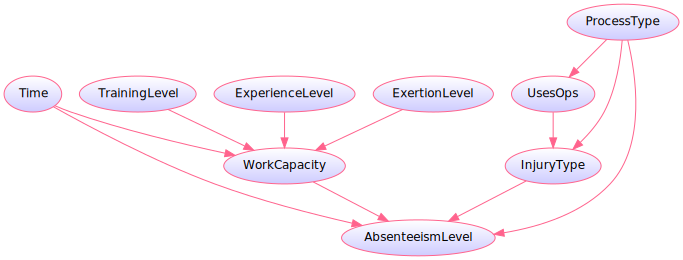

In [10]:
# Build model now with pgmpy
from pgmpy.models import BayesianModel

from src.utils.GraphvizUtil import *

# Defining model structure, just by passing a list of edges.
carModel: BayesianModel = BayesianModel([('Time', 'WorkCapacity'), ('TrainingLevel', 'WorkCapacity'),
                                         ('ExperienceLevel', 'WorkCapacity'), ('ExertionLevel', 'WorkCapacity'),
                                         ('Time', 'AbsenteeismLevel'),
                                         ('ProcessType', 'UsesOps'), ('ProcessType', 'InjuryType'), ('ProcessType',
                                                                                                     'AbsenteeismLevel'),
                                         ('UsesOps', 'InjuryType'), ('InjuryType', 'AbsenteeismLevel'),
                                         ('WorkCapacity', 'AbsenteeismLevel')])
#model: BayesianModel = BayesianModel([('Difficulty', 'Grade'), ('Intelligence', 'Grade'), ('Grade', 'Letter'), ('Intelligence', 'SAT')])

pgmpyToGraph(model  = carModel)

In [11]:
# Next: convert the DataFrames (pandas) into TabularCPDS (pgmpy)

In [12]:

from pgmpy.factors.discrete.CPD import TabularCPD


def dataframeToTabularCPD(variable: Variable, cardinality: int,
                          dataframe: DataFrame, convertFromPercent: bool = True) -> TabularCPD:
    '''
    Convert pandas.DataFrame to pgmpy TabularCPD
    Arguments:
        variable: name of the variable for which we build the CPD object
        cardinality: the number of states that the variable takes on, assumed to occur in the last `numStates` column of this dataframe. (So if number of state is 3, like 'Low', 'High', "Medium", then we assume these are the last 3 columns)
        dataframe: the pandas dataframe, structured as in the above examples
    Returns:
        TabularCPD object with values transferred from DataFrame.
    '''
    # Using this function to get  the index where the conditional variable names end and where the `variable` state names begin. Assuming the CPD values are floats so we can distinguish where they are.
    #def indexOfFirstFloat(vals: List) -> int:
    #    for index, value in list(zip(range(0, len(vals)), vals)):
    #        if type(value) == float:
    #            return index # get index of first float

    # Get number of conditional variables
    numCondVars: int = len(dataframe.columns) - cardinality
    #numCondVars: int = indexOfFirstFloat(dataframe.values[0]) # using the first row

    # Get number of states of the given variable
    #varCardinality: int = len(dataframe.columns) - numCondVars


    # Getting the names of the conditional variables
    condVars: List[Variable] = dataframe.columns[0 : numCondVars]

    # Getting the cardinalities of each of the conditional variables
    condCardinalities: List[int] = [len(np.unique(dataframe[evidenceVar])) for evidenceVar in condVars]

    # Getting the actual numbers (CPD values)
    rawCPDValues: List[List[float]] = dataframe.values.T[numCondVars:].T

    if convertFromPercent:
        # Converting, since they are in percent format (convert into probability format, so 0 < p < 1)
        rawCPDValues = list(map(lambda percentProbList : list(percentProbList / 100.0), rawCPDValues))

    # Maps to the conditional variable names and the list of their states
    condStatesTuples = [(evidenceVar, list(np.unique(dataframe[evidenceVar]))) for evidenceVar in condVars]

    # Get the actual states of the variable
    varStates: List[State] = list(dataframe.columns[numCondVars:])

    # Single map from the given variable name to its states
    varStatesTuples = [(variable, varStates)]

    # Combining above information to create the dictionary of state names for the variable
    stateNames: Dict[Variable, List[State]] = dict(varStatesTuples + condStatesTuples)

    # Now finally constructing the object:
    tabularCPD = TabularCPD(variable = variable, variable_card = cardinality,
                            values = rawCPDValues,
                            evidence = condVars, evidence_card = condCardinalities,
                            state_names = stateNames)

    return tabularCPD

In [13]:

cpd_usesop: TabularCPD = dataframeToTabularCPD(variable = 'UsesOps', cardinality = 4, dataframe = CPD_usesop)
cpd_process: TabularCPD = dataframeToTabularCPD(variable = 'ProcessType', cardinality = 6, dataframe = CPD_processType)
cpd_injury: TabularCPD = dataframeToTabularCPD(variable = 'InjuryType', cardinality = 5, dataframe = CPD_injuryType)
cpd_time: TabularCPD = dataframeToTabularCPD(variable = 'Time', cardinality = 5, dataframe = CPD_time)
cpd_exertion: TabularCPD = dataframeToTabularCPD(variable = 'ExertionLevel', cardinality = 2, dataframe = CPD_exertionLevel)
cpd_experience: TabularCPD = dataframeToTabularCPD(variable = 'ExperienceLevel', cardinality = 2, dataframe = CPD_experienceLevel)
cpd_training: TabularCPD = dataframeToTabularCPD(variable = 'TrainingLevel', cardinality = 2, dataframe = CPD_trainingLevel)
cpd_workcapacity: TabularCPD = dataframeToTabularCPD(variable = 'WorkCapacity', cardinality = 2, dataframe = CPD_workCapacity)
cpd_absentee: TabularCPD = dataframeToTabularCPD(variable = 'AbsenteeismLevel', cardinality = 2, dataframe = CPD_absentee)


carModel.add_cpds(cpd_usesop, cpd_process, cpd_injury, cpd_time, cpd_exertion, cpd_experience, cpd_training, cpd_workcapacity, cpd_absentee)

#assert carModel.check_model() # TODO says sum of CPDs is not equal to 1 for WorkCapacity (atol=0.01 in is_valid_cpd() too low???)

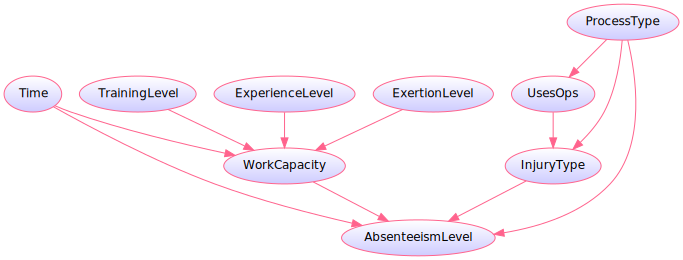

In [14]:
pgmpyToGraph(carModel)

In [15]:
pgmpyToGrid(carModel, 'AbsenteeismLevel', shorten = False) # assert it is the same as CPD_absenteeism.get_values()

[[1, 'Accel-Pedal', 'Chemical-Burn', 'High', 0.7, 0.88],
 [1, 'Accel-Pedal', 'Chemical-Burn', 'Low', 0.3, 0.12],
 [1, 'Accel-Pedal', 'Contact-Contusion', 'High', 0.9, 0.9],
 [1, 'Accel-Pedal', 'Contact-Contusion', 'Low', 0.1, 0.1],
 [1, 'Accel-Pedal', 'Electrical-Burn', 'High', 0.6, 0.157],
 [1, 'Accel-Pedal', 'Electrical-Burn', 'Low', 0.4, 0.843],
 [1, 'Accel-Pedal', 'Electrical-Shock', 'High', 0.8, 0.25],
 [1, 'Accel-Pedal', 'Electrical-Shock', 'Low', 0.2, 0.75],
 [1, 'Accel-Pedal', 'FallGtm', 'High', 0.7, 0.182],
 [1, 'Accel-Pedal', 'FallGtm', 'Low', 0.3, 0.818],
 [1, 'Door-Mount', 'Chemical-Burn', 'High', 0.8, 0.2],
 [1, 'Door-Mount', 'Chemical-Burn', 'Low', 0.2, 0.8],
 [1, 'Door-Mount', 'Contact-Contusion', 'High', 0.69, 0.8998999999999999],
 [1, 'Door-Mount', 'Contact-Contusion', 'Low', 0.31, 0.1001],
 [1, 'Door-Mount', 'Electrical-Burn', 'High', 0.89, 1.0],
 [1, 'Door-Mount', 'Electrical-Burn', 'Low', 0.11, 0.0],
 [1, 'Door-Mount', 'Electrical-Shock', 'High', 0.84, 0.95],
 [1, '

In [16]:
vals = pgmpyToGrid(carModel, 'AbsenteeismLevel', shorten = True) ; vals

[[1, 'Accel-Pedal', 'Chemical-Burn', 'High', 0.7, 0.88],
 [1, 'Accel-Pedal', 'Chemical-Burn', 'Low', 0.3, 0.12],
 [1, 'Accel-Pedal', 'Contact-Contusion', 'High', 0.9, 0.9],
 [1, 'Accel-Pedal', 'Contact-Contusion', 'Low', 0.1, 0.1],
 [1, 'Accel-Pedal', 'Electrical-Burn', 'High', 0.6, 0.157],
 [1, 'Accel-Pedal', 'Electrical-Burn', 'Low', 0.4, 0.843],
 [1, 'Accel-Pedal', 'Electrical-Shock', 'High', 0.8, 0.25],
 [1, 'Accel-Pedal', 'Electrical-Shock', 'Low', 0.2, 0.75],
 [1, 'Accel-Pedal', 'FallGtm', 'High', 0.7, 0.182],
 [1, 'Accel-Pedal', 'FallGtm', 'Low', 0.3, 0.818],
 ['...', '...', '...', '...', '...', '...'],
 [5, 'Sun-Roof-Housing', 'Electrical-Burn', 'Low', 0.6, 0.98],
 [5, 'Sun-Roof-Housing', 'Electrical-Shock', 'High', 0.32356, 0.01],
 [5, 'Sun-Roof-Housing', 'Electrical-Shock', 'Low', 0.6764399999999999, 0.99],
 [5, 'Sun-Roof-Housing', 'FallGtm', 'High', 0.4, 0.02],
 [5, 'Sun-Roof-Housing', 'FallGtm', 'Low', 0.6, 0.98]]

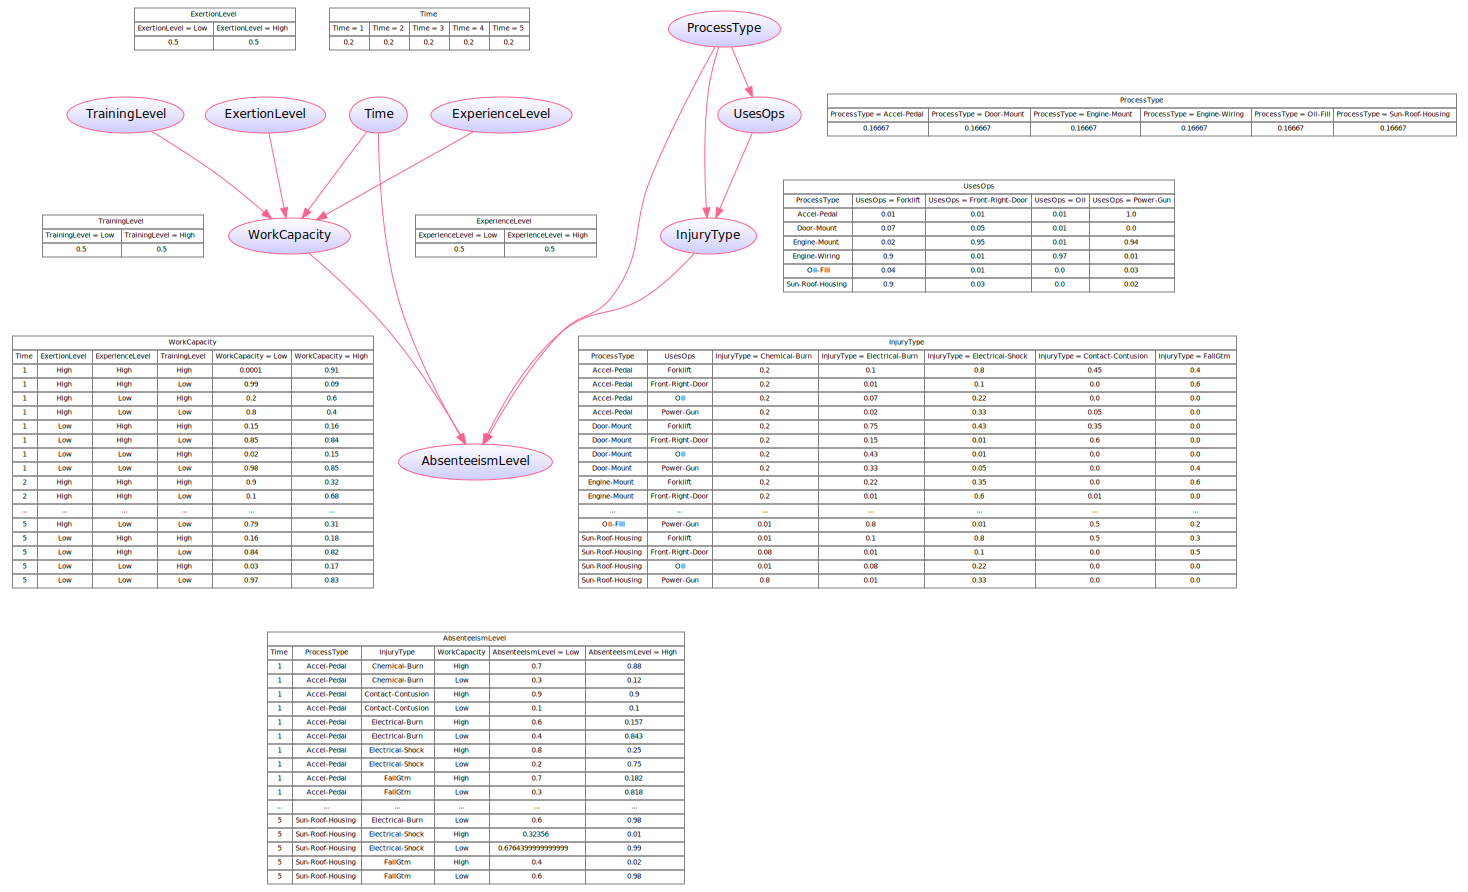

In [17]:

pgmpyToGraphCPD(carModel)